In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [4]:
df=df.drop(['id'],axis=1)

In [5]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   departure city   6700 non-null   object 
 1   discount         6700 non-null   float64
 2   price            6700 non-null   float64
 3   no of items      6700 non-null   int64  
 4   location         6700 non-null   object 
 5   class            6700 non-null   object 
 6   segment          6700 non-null   object 
 7   sub-class        6700 non-null   object 
 8   delivery type    6699 non-null   object 
 9   RID              6700 non-null   int64  
 10  profit           6700 non-null   float64
 11  delivery date    6700 non-null   object 
 12  address code     6700 non-null   int64  
 13  departure state  6700 non-null   object 
 14  placement date   6700 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 785.3+ KB


In [7]:
df['delivery date']=pd.to_datetime(df['delivery date'])

In [8]:
df['delivery date'].head()

0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
Name: delivery date, dtype: datetime64[ns]

In [9]:
df['month_Dd'] = pd.DatetimeIndex(df['delivery date']).month

In [10]:
df['month_Dd'].max()

12

In [11]:
df['placement date']=pd.to_datetime(df['placement date'])

In [12]:
df['placement date'].max()

Timestamp('2021-01-01 00:00:00')

In [13]:
df['month_Pd'] = pd.DatetimeIndex(df['placement date']).month

In [14]:
df['month_Pd'].max()

12

In [15]:
df=df.drop(['placement date','delivery date','month_Pd'],axis=1)

In [16]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,address code,departure state,month_Dd
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,77095,Texas,1
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,48185,Michigan,1
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,48185,Michigan,1
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,48185,Michigan,1
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,48185,Michigan,1


In [17]:
df.nunique()

departure city      469
discount             12
price              4437
no of items          14
location              4
class                 3
segment               3
sub-class            17
delivery type         4
RID                6700
profit             5285
address code        562
departure state      47
month_Dd             12
dtype: int64

In [18]:
#df.groupby('departure state')['departure city'].count()

In [19]:
df=df.drop(['departure city'],axis=1)

In [20]:
df=df.drop(['address code'],axis=1)

In [21]:
df.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1


<AxesSubplot:>

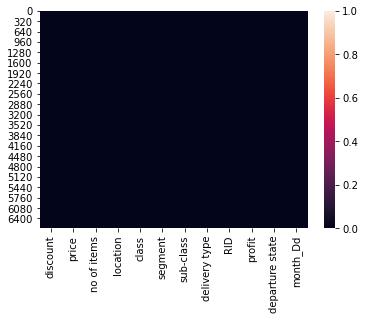

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.isnull().sum()

discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      1
RID                0
profit             0
departure state    0
month_Dd           0
dtype: int64

In [24]:
df['delivery type']=df['delivery type'].fillna(df['delivery type'].mode()[0])

---------------------------------------------------------------------------------------------

### Exploartory Data Analysis

In [25]:
df.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   discount         6700 non-null   float64
 1   price            6700 non-null   float64
 2   no of items      6700 non-null   int64  
 3   location         6700 non-null   object 
 4   class            6700 non-null   object 
 5   segment          6700 non-null   object 
 6   sub-class        6700 non-null   object 
 7   delivery type    6700 non-null   object 
 8   RID              6700 non-null   int64  
 9   profit           6700 non-null   float64
 10  departure state  6700 non-null   object 
 11  month_Dd         6700 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 628.2+ KB


In [27]:
df.describe()

,discount,price,no of items,RID,profit,month_Dd
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,0.155876,234.424275,3.798507,4954.381791,29.121046,7.740149
std,0.205922,641.440815,2.225327,2921.304952,230.712951,3.346591
min,0.000000,0.836000,1.000000,1.000000,-6599.978000,1.000000
25%,0.000000,17.340000,2.000000,2389.750000,1.713750,5.000000
50%,0.200000,54.960000,3.000000,4941.500000,8.803200,9.000000
75%,0.200000,212.940000,5.000000,7507.250000,30.023400,11.000000
max,0.800000,22638.480000,14.000000,9990.000000,8399.976000,12.000000


In [28]:
df.nunique()

discount             12
price              4437
no of items          14
location              4
class                 3
segment               3
sub-class            17
delivery type         4
RID                6700
profit             5285
departure state      47
month_Dd             12
dtype: int64

C:\Users\Mahaveer\anaconda3\envs\tensor\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

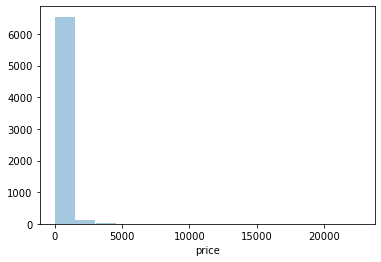

In [29]:
sns.distplot(df.price, bins =15,kde = False)

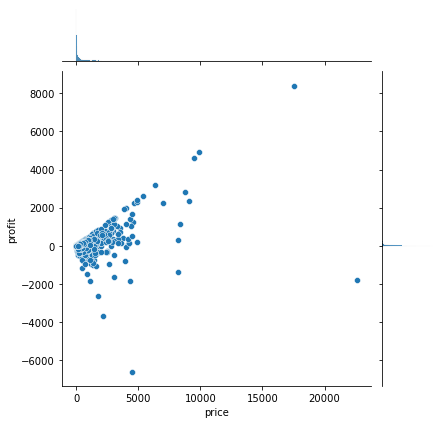

In [30]:
sns.jointplot(x='price',y='profit',data=df)

In [31]:
df.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1


<AxesSubplot:>

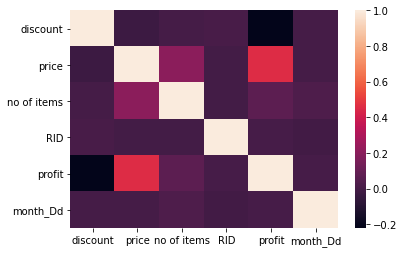

In [32]:
sns.heatmap(df.corr())

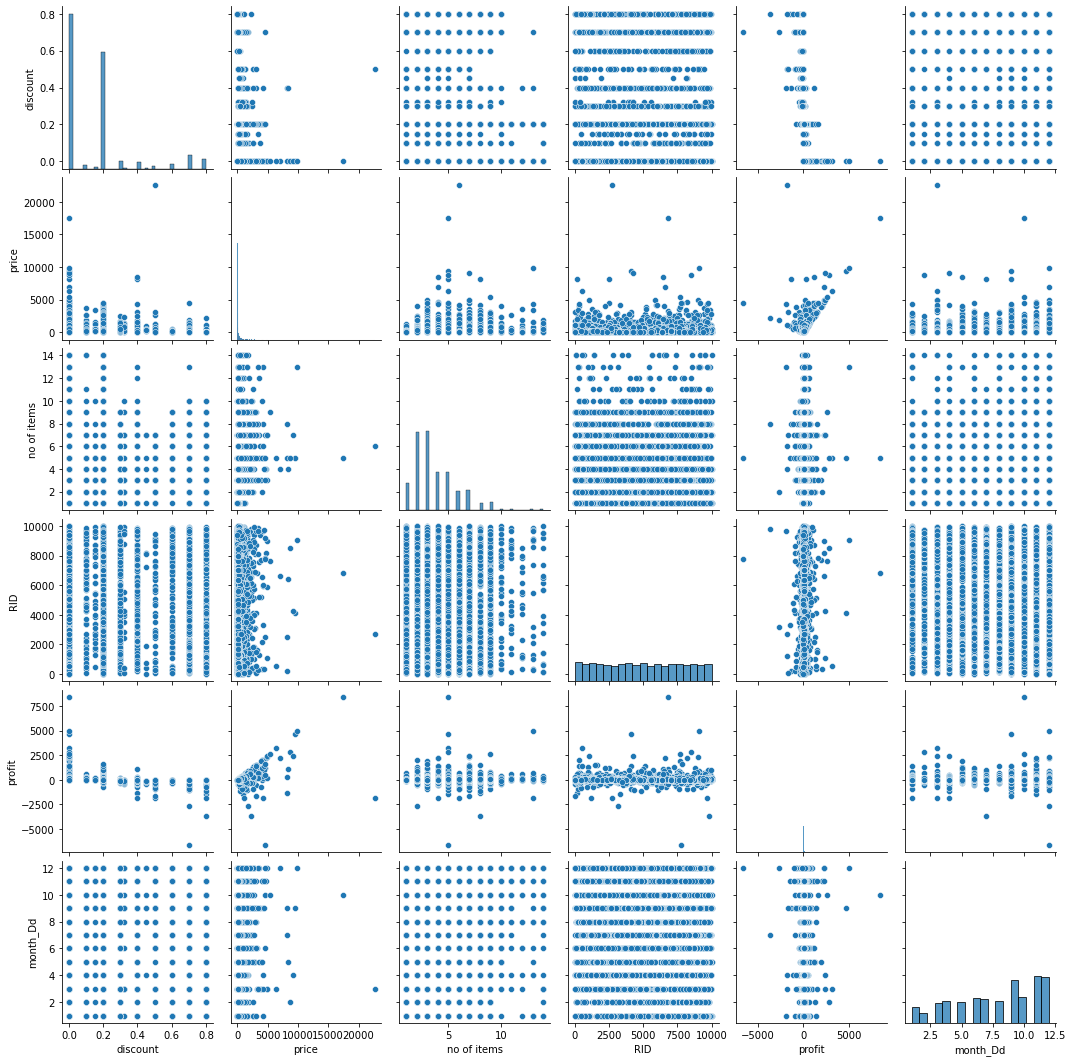

In [33]:
sns.pairplot(df)

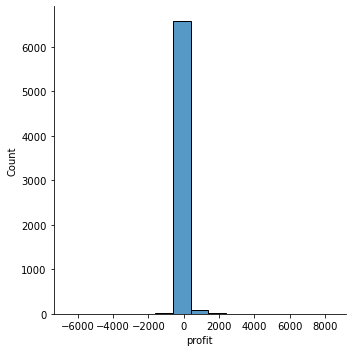

In [34]:
sns.displot(df.profit,binwidth = 1000
           )

In [35]:
df.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1


<AxesSubplot:xlabel='location', ylabel='profit'>

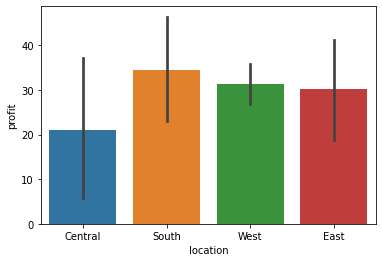

In [36]:
sns.barplot(x='location',y='profit',data=df)

<AxesSubplot:xlabel='class', ylabel='profit'>

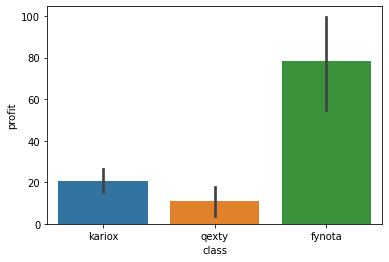

In [37]:
sns.barplot(x='class',y='profit',data=df)

<AxesSubplot:xlabel='segment', ylabel='profit'>

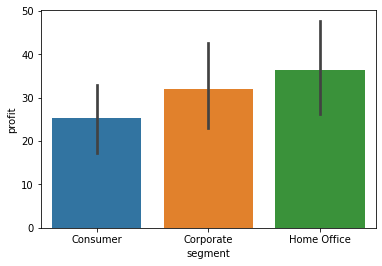

In [38]:
sns.barplot(x='segment',y='profit',data=df)

<AxesSubplot:xlabel='sub-class', ylabel='profit'>

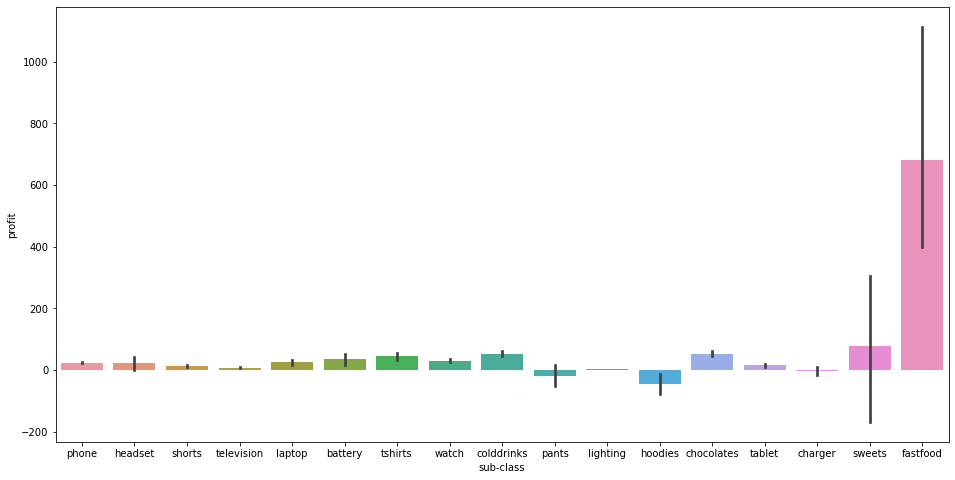

In [39]:
plt.figure(figsize=(16,8))
sns.barplot(x='sub-class',y='profit',data=df)

<AxesSubplot:xlabel='delivery type', ylabel='profit'>

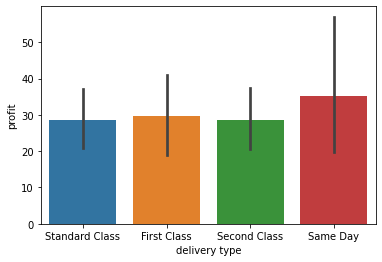

In [40]:
sns.barplot(x='delivery type',y='profit',data=df)

<AxesSubplot:xlabel='profit', ylabel='departure state'>

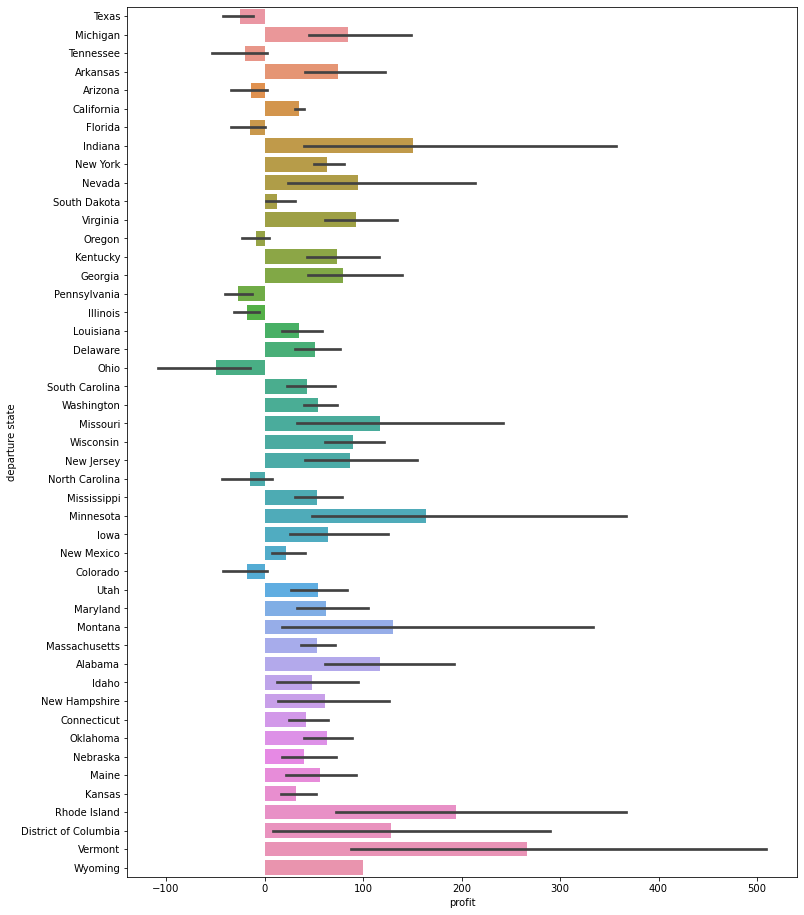

In [41]:
plt.figure(figsize=(12,16))
sns.barplot(y='departure state',x='profit',data=df)

<AxesSubplot:xlabel='month_Dd', ylabel='profit'>

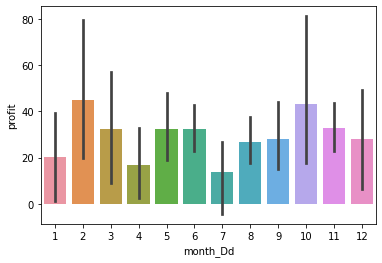

In [42]:
sns.barplot(x='month_Dd',y='profit',data=df)

--------------------------------------------------------------------------------

#### Some Conclusions from EDA

In [43]:
df.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1


In [44]:
df.groupby('delivery type').profit.mean()

delivery type
First Class       29.639892
Same Day          35.079506
Second Class      28.570654
Standard Class    28.651663
Name: profit, dtype: float64

In [45]:
df['delivery type']=df['delivery type'].replace({'First Class':'Other Class','Second Class':'Other Class','Standard Class':'Other Class'})

In [46]:
df.groupby('location').profit.mean()

location
Central    20.996286
East       30.317639
South      34.413121
West       31.233806
Name: profit, dtype: float64

In [47]:
#df['location']=df['location'].replace({'East':'Non-Central','South':'Non-Central','West':'Non-Central'})

In [48]:
#df.groupby('location')['departure state'].count()

In [49]:
#df.groupby(['location','departure state']).profit.mean()

In [50]:
#df=df.drop(['departure state'],axis=1)

In [51]:
df.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd
0,0.2,16.448,2,Central,kariox,Consumer,phone,Other Class,7981,5.5512,Texas,1
1,0.0,29.700,5,Central,kariox,Consumer,headset,Other Class,6334,13.3650,Michigan,1
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Other Class,6333,4.8609,Michigan,1
3,0.0,43.920,3,Central,kariox,Consumer,television,Other Class,6332,12.7368,Michigan,1
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Other Class,6331,15.9792,Michigan,1


In [52]:
df.groupby('delivery type').profit.count()

delivery type
Other Class    6343
Same Day        357
Name: profit, dtype: int64

-------------------------------------------------------------------------

In [53]:
data=pd.get_dummies(df)

In [54]:
data.head()

,discount,price,no of items,RID,profit,month_Dd,location_Central,location_East,location_South,location_West,...,departure state_South Carolina,departure state_South Dakota,departure state_Tennessee,departure state_Texas,departure state_Utah,departure state_Vermont,departure state_Virginia,departure state_Washington,departure state_Wisconsin,departure state_Wyoming
0,0.2,16.448,2,7981,5.5512,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,29.700,5,6334,13.3650,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,14.730,3,6333,4.8609,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,43.920,3,6332,12.7368,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,66.580,2,6331,15.9792,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data=data.drop(['location_Central','class_fynota','segment_Consumer','sub-class_battery','delivery type_Other Class'],axis=1)

In [56]:
data.columns

Index(['discount', 'price', 'no of items', 'RID', 'profit', 'month_Dd',
       'location_East', 'location_South', 'location_West', 'class_kariox',
       'class_qexty', 'segment_Corporate', 'segment_Home Office',
       'sub-class_charger', 'sub-class_chocolates', 'sub-class_colddrinks',
       'sub-class_fastfood', 'sub-class_headset', 'sub-class_hoodies',
       'sub-class_laptop', 'sub-class_lighting', 'sub-class_pants',
       'sub-class_phone', 'sub-class_shorts', 'sub-class_sweets',
       'sub-class_tablet', 'sub-class_television', 'sub-class_tshirts',
       'sub-class_watch', 'delivery type_Same Day', 'departure state_Alabama',
       'departure state_Arizona', 'departure state_Arkansas',
       'departure state_California', 'departure state_Colorado',
       'departure state_Connecticut', 'departure state_Delaware',
       'departure state_District of Columbia', 'departure state_Florida',
       'departure state_Georgia', 'departure state_Idaho',
       'departure state_Illin

------------------------------------------------

In [73]:
y=data['profit']

In [74]:
X=data.drop(['profit'],axis=1)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import accuracy_score

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [78]:
scaler=StandardScaler()

In [79]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
#reg = LinearRegression()

In [81]:
ridg= Ridge(alpha=50).fit(X_train_scaled,y_train)

In [82]:
ridg.score(X_test_scaled,y_test)

0.21749535830519617

In [83]:
reg = LinearRegression().fit(X_train_scaled,y_train)

In [84]:
reg.score(X_test_scaled,y_test)

0.21343990802925872

In [85]:
rm1= RandomForestRegressor().fit(X_train_scaled,y_train)

In [86]:
rm1.score(X_test_scaled,y_test)

0.8087086006255385

In [87]:
rm2= RandomForestRegressor().fit(X_train,y_train)

In [88]:
rm2.score(X_test,y_test)

0.7966662921011902